In [1]:
import numpy as np
import scipy as sp
import pandas as pd

In [2]:
import scipy.stats as stats

In [3]:
import plotly.graph_objects as go
import plotly.express as px

<h1><font face = 'Serif'; size = 20; color = 'red'>Statistical Inference </font></h1>

<div class="alert alert-block alert-info">
    <font face = 'garamond'; size = 5; color = 'Blue'><b>Introduction :</b></font><font face = 'Times'; size = 5; color = 'Green'>Statistical Inference</font>
    <hr>
<font face = 'Times'; size = 4; color = 'Black'>Statistical inference involves making an inference or prediction about an unknown population parameter of interest from information that is obtained by using a sample statistic. In this chapter, we will begin by describing two basic types of statistical inference: estimation and hypothesis testing. </font>
</div>

<div class="alert alert-block alert-info">
    <font face = 'garamond'; size = 5; color = 'Blue'><b>Confidence Interval:</b></font>
    <hr>
<font face = 'Times'; size = 4; color = 'Black'> A confidence interval for a population parameter can be used to estimate a range of values where we have some degree of confidence that this interval contains the unknown population parameter of interest. For example, a confidence interval for a population mean is determined by using the sample mean and then calculating upper and lower bounds such that between these two boundary points, we have some degree of confidence that the interval contains the unknown population mean. 

Key characteristics of a confidence interval include:
<ul>
<li>Point Estimate: The sample statistic, such as the sample mean or proportion, serves as the point estimate of the population parameter.

<li>Margin of Error: The confidence interval includes a margin of error, which is a range of values that are added to and subtracted from the point estimate. This margin of error accounts for the uncertainty in the estimation process.

<li>Confidence Level: The confidence level, often expressed as a percentage (e.g., 95% or 99%), represents the probability that the calculated confidence interval contains the true population parameter. 
        </ul>
A common way to express a confidence interval is in the form of "point estimate ± margin of error."</font>
    
</div>

# 1. Confidence Intervals for a Population Mean ($\mu$)

<div class="alert alert-block alert-warning">
    <font face = 'garamond'; size = 5; color = 'tomato'><b>When n < 30 :</b></font><font face = 'Times'; size = 5; color = 'Green'> <i>t - Distribution</i></font>
    <hr>
<font face = 'Times'; size = 4; color = 'Black'>For small samples, we need to assume that the population being sampled from is approximately normally distributed. Standardizing a given value of the sample mean gives the following test statistic, which 
is a random variable that follows the t-distribution: 
<br>
    
$$T = \frac{ \bar x - \mu }{ \frac{s}{\sqrt{n}}}$$
    <br>
Thus, the unknown population meanμwill fall between:
    <br>
$$ \bar x - t_{\alpha / 2} \cdot \frac{s}{\sqrt{n}} <  \mu < \bar x + t_{\alpha / 2} \cdot \frac{s}{\sqrt{n}}$$
<br>
$$ \left( \bar x - t_{\alpha / 2} \cdot \frac{s}{\sqrt{n}} , \bar x + t_{\alpha / 2} \cdot \frac{s}{\sqrt{n}} \right)$$
        </font>
</div>

1. A random sample of 18 car dealers found that this particular sample of dealers spent an average amount of 5,500 per month on the cost of advertising and the sample standard deviation was calculated to be 500. Suppose that we want to find a 95% confidence interval for the unknown mean (or average) amount of money that the population of car dealers spends monthly on advertising.

Assuming that the population we are sampling from is normally distributed, we can use the sample mean (x = $5,500) and the sample standard deviation s = 500) to calculate a 95% confidence interval.

In [42]:
n = 18
mu = 0
var = 1
alpha = 0.95

t_critical = stats.t.ppf((1 + alpha) / 2, df=n)
x = np.linspace(mu - 5 * np.sqrt(var), mu + 5 * np.sqrt(var), 1000)

pdf = stats.t.pdf(x, df=n, loc=mu, scale=np.sqrt(var))

trace = go.Scatter(x=x, y=pdf, mode='lines', name=f't-distribution (df={n})')

x_fill_down = np.linspace(mu -5 * np.sqrt(var), -1*t_critical, 1000)
pdf_fill_below = stats.t.pdf(x_fill_down, df=n, loc=mu, scale=np.sqrt(var))

confidence_interval1 = go.Scatter(
    x=x_fill_down,
    y=pdf_fill_below,
    fill='tozeroy',
    fillcolor='rgba(255, 0, 0, 0.5)', 
    mode='none',
    name=f'Left Tail {alpha:.2f}'
)

x_fill = np.linspace(-t_critical, t_critical, 1000)
pdf_fill = stats.t.pdf(x_fill, df=n, loc=mu, scale=np.sqrt(var))

confidence_interval2 = go.Scatter(x=x_fill, y=pdf_fill, fill='tozeroy', fillcolor='rgba(0, 0, 255, 0.1)', mode='none', name=f'Confidence Level {alpha:.2f}')

x_fill_up = np.linspace(t_critical, 5 * np.sqrt(var), 1000)
pdf_fill_above = stats.t.pdf(x_fill_up, df=n, loc=mu, scale=np.sqrt(var))

confidence_interval_above = go.Scatter(
    x=x_fill_up,
    y=pdf_fill_above,
    fill='tozeroy',
    fillcolor='rgba(255, 0, 0, 0.5)',  
    mode='none',
    name=f'Right Tail {alpha:.2f}'
)

layout = go.Layout(title=f't-Distribution with {n} Degrees of Freedom', xaxis=dict(title='X'), yaxis=dict(title='Probability Density'), showlegend=True)

fig = go.Figure(data=[trace, confidence_interval1,confidence_interval2,confidence_interval_above], layout=layout)

fig.show()

In [71]:
t_critical = stats.t.ppf((1 + 0.95) / 2, df=17)

E = t_critical*(500/np.sqrt(18))

mu = [5500-E, 5500+E]
mu

[5251.355849643524, 5748.644150356476]

In [72]:
category = 'Amount'

scatter_x = [category]
scatter_y = [5500]

line_x = [category, category]
line_y = [mu[0], mu[1]]

scatter_trace = go.Scatter(
    x=scatter_x,
    y=scatter_y,
    mode='markers',
    marker=dict(size=15, color='blue'),
    name='Sample Mean'
)

line_trace = go.Scatter(
    x=line_x,
    y=line_y,
    mode='lines+markers',
    line=dict(color='red', width=2),
    name='Range of Mean'
)

layout = go.Layout(
    title='Interval Plot',
    xaxis=dict(title='Car Dealers Population'),
    yaxis=dict(title='$\mu$'),
    template = 'plotly_white'
)

fig = go.Figure(data=[ line_trace, scatter_trace], layout=layout)

fig.show()

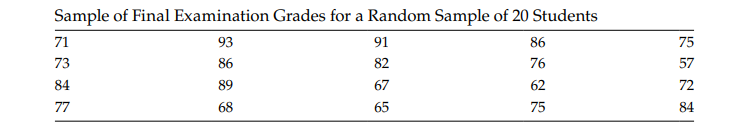

Suppose we want to find a 99% confidence interval for the mean final examination grade for the population of all students taking the statistics examination at our site

In [87]:
data = [71,73,84,77,93,86,89,68,91,82,67,65,86,76,62,75,75,57,72,84]

In [88]:
mu = 0
var = 1
alpha = 0.99
n = len(data)-1

t_critical = stats.t.ppf((1 + alpha) / 2, df=n)
x = np.linspace(mu - 5 * np.sqrt(var), mu + 5 * np.sqrt(var), 1000)

pdf = stats.t.pdf(x, df=n, loc=mu, scale=np.sqrt(var))

trace = go.Scatter(x=x, y=pdf, mode='lines', name=f't-distribution (df={n})')

x_fill_down = np.linspace(mu -5 * np.sqrt(var), -1*t_critical, 1000)
pdf_fill_below = stats.t.pdf(x_fill_down, df=n, loc=mu, scale=np.sqrt(var))

confidence_interval1 = go.Scatter(
    x=x_fill_down,
    y=pdf_fill_below,
    fill='tozeroy',
    fillcolor='rgba(255, 0, 0, 0.5)', 
    mode='none',
    name=f'Left Tail {alpha:.2f}'
)

x_fill = np.linspace(-t_critical, t_critical, 1000)
pdf_fill = stats.t.pdf(x_fill, df=n, loc=mu, scale=np.sqrt(var))

confidence_interval2 = go.Scatter(x=x_fill, y=pdf_fill, fill='tozeroy', fillcolor='rgba(0, 0, 255, 0.1)', mode='none', name=f'Confidence Level {alpha:.2f}')

x_fill_up = np.linspace(t_critical, 5 * np.sqrt(var), 1000)
pdf_fill_above = stats.t.pdf(x_fill_up, df=n, loc=mu, scale=np.sqrt(var))

confidence_interval_above = go.Scatter(
    x=x_fill_up,
    y=pdf_fill_above,
    fill='tozeroy',
    fillcolor='rgba(255, 0, 0, 0.5)',  
    mode='none',
    name=f'Right Tail {alpha:.2f}'
)

layout = go.Layout(title=f't-Distribution with {n} Degrees of Freedom', xaxis=dict(title='X'), yaxis=dict(title='Probability Density'), showlegend=True)

fig = go.Figure(data=[trace, confidence_interval1,confidence_interval2,confidence_interval_above], layout=layout)

fig.show()

In [106]:
t_critical = stats.t.ppf((1 + alpha) / 2, df=n)

E = t_critical*(np.std(data, ddof= 1)/np.sqrt(20))

mu = [np.mean(data)-E, np.mean(data)+E]
mu

[70.22830774500399, 83.07169225499602]

In [107]:
category = 'Grades'

scatter_x = [category]
scatter_y = [np.mean(data)]

line_x = [category, category]
line_y = [mu[0], mu[1]]

scatter_trace = go.Scatter(
    x=scatter_x,
    y=scatter_y,
    mode='markers',
    marker=dict(size=15, color='blue'),
    name='Sample Mean'
)

line_trace = go.Scatter(
    x=line_x,
    y=line_y,
    mode='lines+markers',
    line=dict(color='red', width=2),
    name='Range of Mean'
)

layout = go.Layout(
    title='Interval Plot',
    xaxis=dict(title='Examination Grades'),
    yaxis=dict(title='$\mu$'),
    template = 'plotly_white'
)

fig = go.Figure(data=[ line_trace, scatter_trace], layout=layout)

fig.show()

In [100]:
stats.t.interval(confidence=0.99, df=len(data)-1, loc=np.mean(data), scale=sp.stats.sem(data))

(70.22830774500399, 83.07169225499602)

<div class="alert alert-block alert-warning">
    <font face = 'garamond'; size = 5; color = 'tomato'><b>When n < 30 :</b></font><font face = 'Times'; size = 5; color = 'Green'> <i>Hypothesis test with t-Test</i></font>
    <hr>
<font face = 'Times'; size = 4; color = 'Black'>
        A one-sample t-test always uses the following null hypothesis:
<br>
    
$H_0: μ = μ_0$ (population mean is equal to some hypothesized value $μ_0$)
The alternative hypothesis can be either two-tailed, left-tailed, or right-tailed:

$H_1 (two-tailed): μ ≠ μ_0$ (population mean is not equal to some hypothesized value $μ_0$)

$H_1 (left-tailed): μ < μ_0$ (population mean is less than some hypothesized value $μ_0$)

$H_1 (right-tailed): μ > μ_0$ (population mean is greater than some hypothesized value $μ_0$)

We use the following formula to calculate the test statistic t:

$$t = \frac{\left(x – \mu \right)}{\left( \frac{s}{\sqrt{n}}\right)}$$

where:

<ul>
<li><span style="color: #000000;"><strong><span style="text-decoration: overline;">x</span>: </strong>sample mean</span></li>
<li><span style="color: #000000;"><strong>μ<sub>0</sub>:</strong> hypothesized population mean</span></li>
<li><span style="color: #000000;"><strong>s:&nbsp;</strong>sample standard deviation</span></li>
<li><span style="color: #000000;"><strong>n:&nbsp;</strong>sample size</span></li>
</ul>

If the p-value that corresponds to the test statistic t with (n-1) degrees of freedom is less than your chosen significance level (common choices are 0.10, 0.05, and 0.01) then you can reject the null hypothesis.
        
<b><u>One Sample t-test: Assumptions</u></b>

For the results of a one sample t-test to be valid, the following assumptions should be met:

<ul>
<li><strong><span style="color: #000000;">The variable under study should be either an interval or ratio variable</a>.</span></strong></li>
<li><span style="color: #000000;"><strong>The observations in the sample should be independent</a>.</strong></span></li>
<li><span style="color: #000000;"><strong>The variable under study should be approximately normally distributed.&nbsp;</strong><span style="color: #000000;">You can check this assumption by creating a histogram and visually checking if the distribution has roughly a “bell shape.”</span></span></li>
<li><span style="color: #000000;"><strong>The variable under study should have no outliers.</strong> You can check this assumption by creating a boxplot</a> and visually checking for outliers.</span></li>
</ul>
</div>

</font>